In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

In [2]:
to_drop = ['Unnamed: 0', 'title', 'song_name', 'analysis_url', 'uri', 'track_href', 'type']
df_original = pd.read_csv('genres_v2.csv')
df = df_original.drop(to_drop, axis=1)
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo                      id  \
0          0.013400    0.0556   0.3890  156.985  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  115.080  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  218.050  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  186.948  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  147.988  4jCeguq9rMTlbMmPHuO7S3   

   duration_ms  time_signature      genre  
0       124539               4  Dark Trap  
1       224427               4  Dark Trap  
2        98821               4  Dark Trap  
3       123661               3  Dark Trap  
4       123298               4  Dark Trap

In [3]:
ids = df['id']
df.drop('id', axis=1, inplace=True)

In [4]:
genres = df['genre']
df.drop('genre', inplace=True, axis=1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df_scaled.head()

danceability    energy       key  loudness  mode  speechiness  \
0      0.829884  0.813955  0.181818  0.712039   1.0     0.430304   
1      0.708527  0.492877  0.727273  0.715710   1.0     0.061410   
2      0.850471  0.892974  0.454545  0.782742   1.0     0.042890   
3      0.445227  0.780947  0.000000  0.784742   1.0     0.086971   
4      0.794127  0.623909  0.181818  0.703712   1.0     0.292754   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      0.060525          0.013549  0.045943  0.382028  0.610006     0.111487   
1      0.405870          0.000000  0.109792  0.108635  0.351848     0.224043   
2      0.013967          0.000004  0.369692  0.021046  0.986200     0.082507   
3      0.023987          0.000000  0.105699  0.161250  0.794595     0.110497   
4      0.219635          0.000000  0.158907  0.590426  0.554579     0.110088   

   time_signature  
0            0.75  
1            0.75  
2            0.75  
3            0.50  
4            0.75

In [6]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=13)
fit = selector.fit(df_scaled, genres)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_scaled.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Score']
print(featureScores.nlargest(13, 'Score'))

            Features        Score
11       duration_ms  4793.470184
7   instrumentalness  4161.206522
1             energy  1972.714458
0       danceability  1866.378215
3           loudness  1425.259885
10             tempo  1304.146670
5        speechiness  1104.793811
9            valence  1078.975997
6       acousticness   733.002076
8           liveness   262.479788
4               mode    90.763628
2                key    27.666341
12    time_signature    11.355391


In [7]:
from sklearn.ensemble import ExtraTreesClassifier
model_selector = ExtraTreesClassifier()
model_selector.fit(df_scaled, genres)
importances = pd.Series(model_selector.feature_importances_, index=df_scaled.columns)
importances.sort_values(ascending=False, inplace=True)
print(importances)

tempo               0.188105
duration_ms         0.110085
instrumentalness    0.108174
danceability        0.097978
energy              0.084411
loudness            0.081508
valence             0.076248
speechiness         0.069338
acousticness        0.063252
liveness            0.054674
key                 0.042753
mode                0.014355
time_signature      0.009119
dtype: float64


In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=13)
fs.fit(df_scaled, genres)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000),
                max_features=13)

In [7]:
df_main = pd.DataFrame(fs.transform(df_scaled))

In [8]:
for column in df_main:
    if df_main[column].dtype == 'float64':
       df_main[column] = pd.to_numeric(df_main[column], downcast='float')

<AxesSubplot:xlabel='Count', ylabel='genre'>

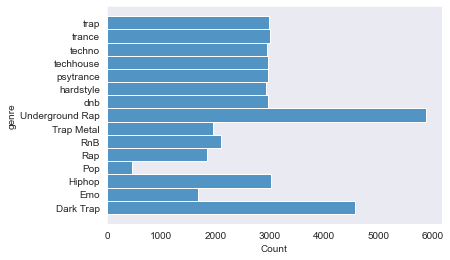

In [20]:
sns.histplot(y=genres)

In [9]:
genres_dummy = pd.get_dummies(genres)

In [10]:
df_gen = pd.concat([df_main, genres_dummy], axis=1)
df_gen.head()

0         1         2         3         4         5  Dark Trap  Emo  \
0  0.829884  0.813955  0.712039  0.013549  0.610006  0.111487          1    0   
1  0.708527  0.492877  0.715710  0.000000  0.351848  0.224043          1    0   
2  0.850471  0.892974  0.782742  0.000004  0.986200  0.082507          1    0   
3  0.445227  0.780947  0.784742  0.000000  0.794595  0.110497          1    0   
4  0.794127  0.623909  0.703712  0.000000  0.554579  0.110088          1    0   

   Hiphop  Pop  ...  RnB  Trap Metal  Underground Rap  dnb  hardstyle  \
0       0    0  ...    0           0                0    0          0   
1       0    0  ...    0           0                0    0          0   
2       0    0  ...    0           0                0    0          0   
3       0    0  ...    0           0                0    0          0   
4       0    0  ...    0           0                0    0          0   

   psytrance  techhouse  techno  trance  trap  
0          0          0       0       0     0  
1          0          0       0       0     0  
2          0          0       0       0     0  
3          0          0       0       0     0  
4          0          0       0       0     0  

[5 rows x 21 columns]

In [16]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                42305 non-null  float32
 1   1                42305 non-null  float32
 2   2                42305 non-null  float32
 3   3                42305 non-null  float32
 4   4                42305 non-null  float32
 5   5                42305 non-null  float32
 6   Dark Trap        42305 non-null  uint8  
 7   Emo              42305 non-null  uint8  
 8   Hiphop           42305 non-null  uint8  
 9   Pop              42305 non-null  uint8  
 10  Rap              42305 non-null  uint8  
 11  RnB              42305 non-null  uint8  
 12  Trap Metal       42305 non-null  uint8  
 13  Underground Rap  42305 non-null  uint8  
 14  dnb              42305 non-null  uint8  
 15  hardstyle        42305 non-null  uint8  
 16  psytrance        42305 non-null  uint8  
 17  techhouse   

# t-sne visualization

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_result = tsne.fit_transform(df_gen)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

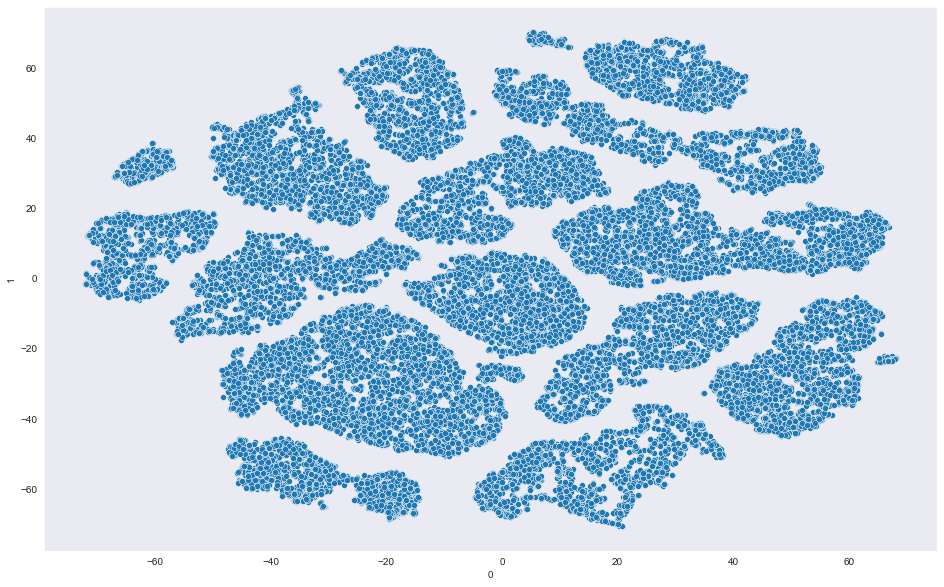

In [12]:
plt.figure(figsize=(16, 10))
tnse_result_df = pd.DataFrame(tsne_result)
sns.scatterplot(data=tnse_result_df, x=0, y=1)

<AxesSubplot:xlabel='0', ylabel='1'>

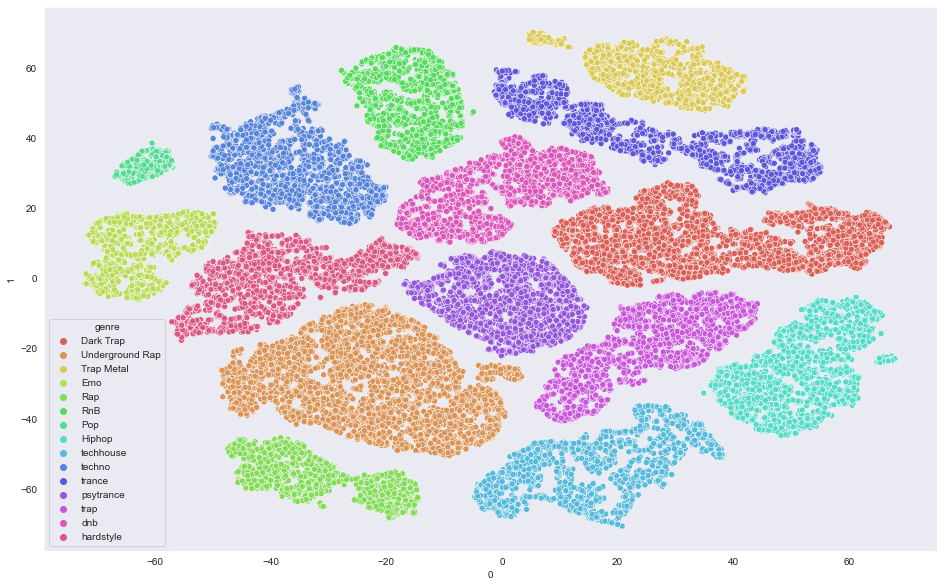

In [13]:
tsne_genre = tnse_result_df.copy(deep=True)
tsne_genre['genre'] = genres
plt.figure(figsize=(16, 10))
sns.scatterplot(data=tsne_genre, x=0, y=1, hue='genre', palette=sns.color_palette('hls', 15))

# Appling ML Algorithms

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## K-Means

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got 

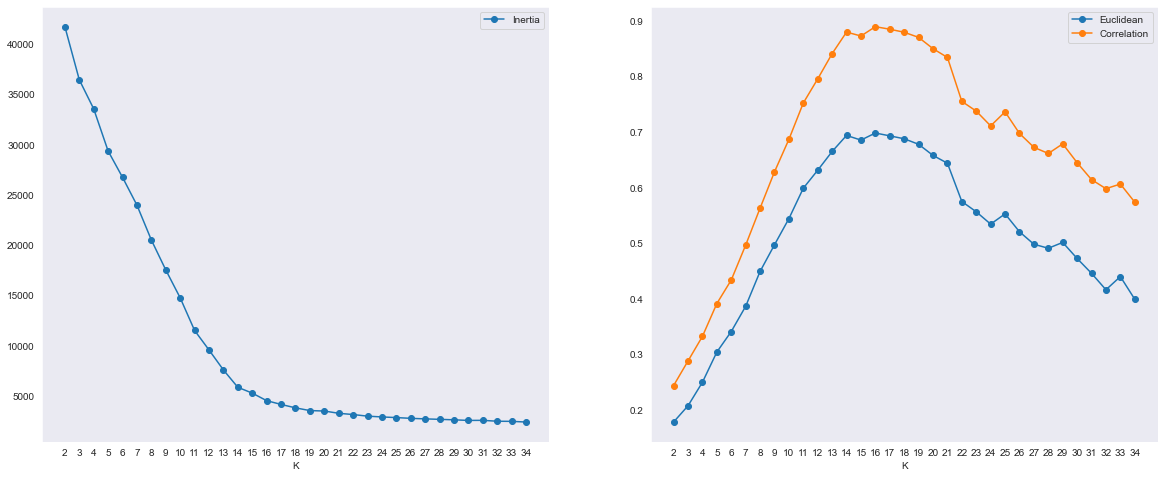

In [20]:
results = dict()
k_cand = np.arange(2, 35)

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_gen)
    score0 = kmeans.inertia_
    score1 = silhouette_score(df_gen, kmeans.labels_, metric='euclidean')
    score2 = silhouette_score(df_gen, kmeans.labels_, metric='correlation')
    results[k] = {'k':kmeans, 's0':score0, 's1':score1, 's2':score2}

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(20, 8))
axs[0].plot([i for i in results.keys()], [i['s0'] for i in results.values()], 'o-', label='Inertia')
axs[1].plot([i for i in results.keys()], [i['s1'] for i in results.values()], 'o-', label='Euclidean')
axs[1].plot([i for i in results.keys()], [i['s2'] for i in results.values()], 'o-', label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

In [29]:
results

{2: {'k': KMeans(n_clusters=2, random_state=0),
  's0': 41727.3125,
  's1': 0.1788581,
  's2': 0.24444540654560895},
 3: {'k': KMeans(n_clusters=3, random_state=0),
  's0': 36453.8125,
  's1': 0.20811324,
  's2': 0.2887326165247158},
 4: {'k': KMeans(n_clusters=4, random_state=0),
  's0': 33560.5078125,
  's1': 0.25040156,
  's2': 0.332921552469796},
 5: {'k': KMeans(n_clusters=5, random_state=0),
  's0': 29376.85546875,
  's1': 0.3047185,
  's2': 0.39193678579447055},
 6: {'k': KMeans(n_clusters=6, random_state=0),
  's0': 26762.03125,
  's1': 0.34166217,
  's2': 0.43428413862675735},
 7: {'k': KMeans(n_clusters=7, random_state=0),
  's0': 23995.28515625,
  's1': 0.3869977,
  's2': 0.49704448590556805},
 8: {'k': KMeans(random_state=0),
  's0': 20537.76171875,
  's1': 0.44966412,
  's2': 0.5635244175016935},
 9: {'k': KMeans(n_clusters=9, random_state=0),
  's0': 17562.810546875,
  's1': 0.49763742,
  's2': 0.6287895349821849},
 10: {'k': KMeans(n_clusters=10, random_state=0),
  's0':

In [13]:
kmean = KMeans(n_clusters=16, random_state=0).fit(df_gen)
kmean_clusters = kmean.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

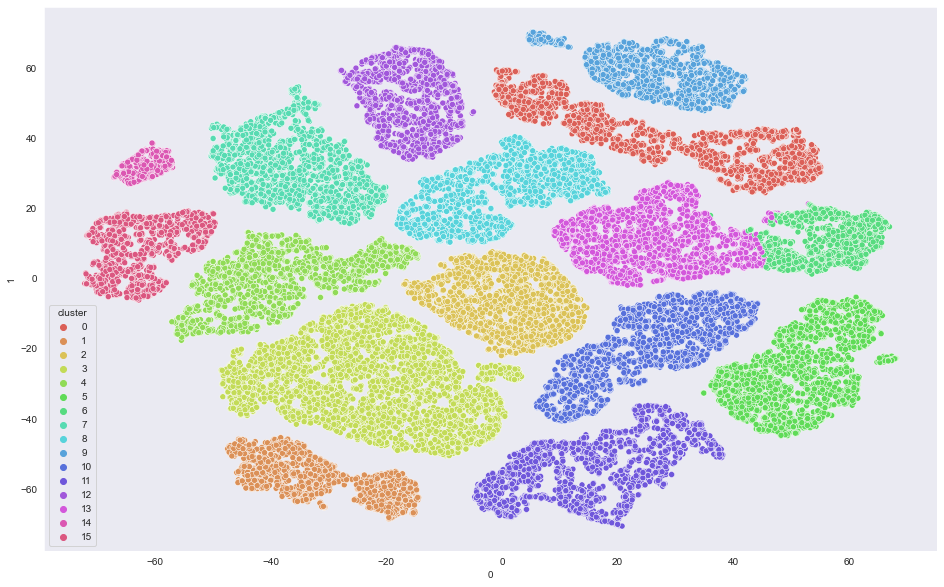

In [22]:
tsne_kmean = tnse_result_df.copy(deep=True)
tsne_kmean['cluster'] = kmean_clusters
plt.figure(figsize=(16, 10))
sns.scatterplot(data=tsne_kmean, x=0, y=1, hue='cluster', palette=sns.color_palette('hls', 16))

## DBSCAN

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


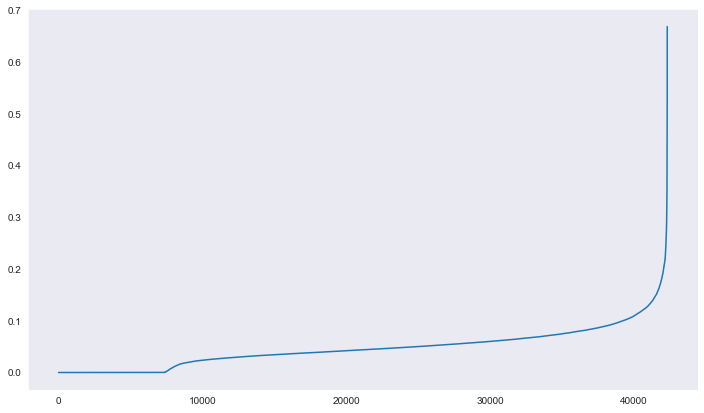

In [23]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(df_gen)
distances, indices = neighbors_fit.kneighbors(df_gen)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(12,7))
plt.plot(distances)

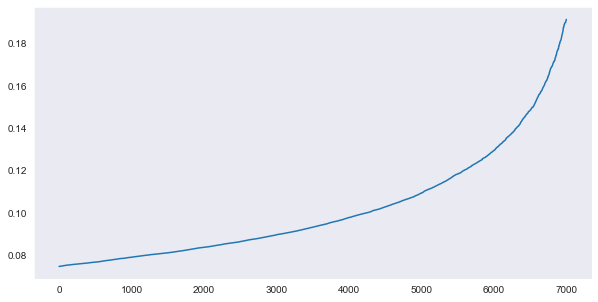

In [24]:
plt.figure(figsize=(10,5))
plt.plot(distances[35000:42000])

In [26]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.15, min_samples=15)
db.fit(df_gen)
db_labels = db.labels_
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(df_gen, db_labels))

Estimated number of clusters: 15
Estimated number of noise points: 2211
Silhouette Coefficient: 0.654


<AxesSubplot:xlabel='0', ylabel='1'>

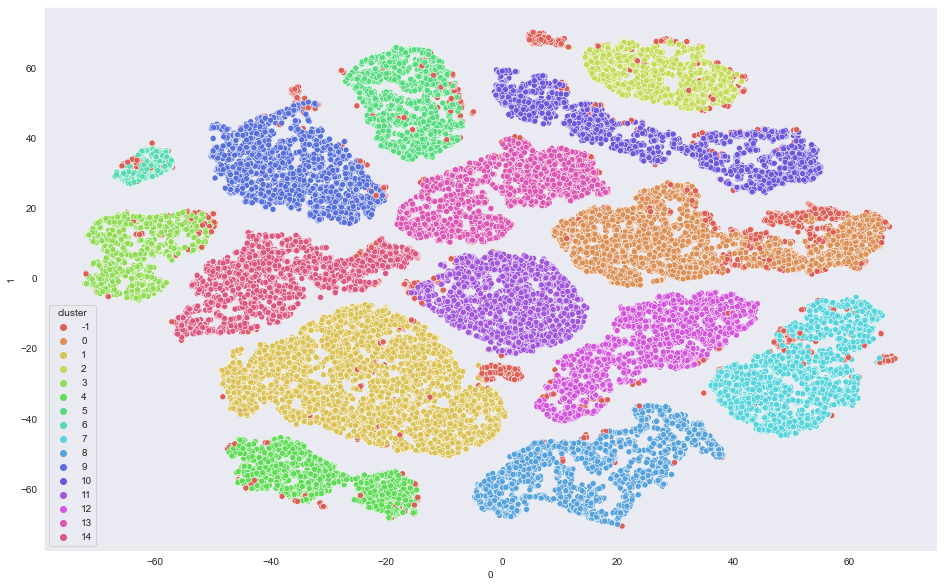

In [28]:
tsne_db = tnse_result_df.copy(deep=True)
tsne_db['cluster'] = db_labels
plt.figure(figsize=(16, 10))
sns.scatterplot(data=tsne_db, x=0, y=1, hue='cluster', palette=sns.color_palette('hls', 16))

## Agglomerative Clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering
model_agg = AgglomerativeClustering(n_clusters=16).fit(df_gen)
agg_labels = model_agg.labels_
score = silhouette_score(df_gen, agg_labels)
print(score)

0.6972187


<AxesSubplot:xlabel='0', ylabel='1'>

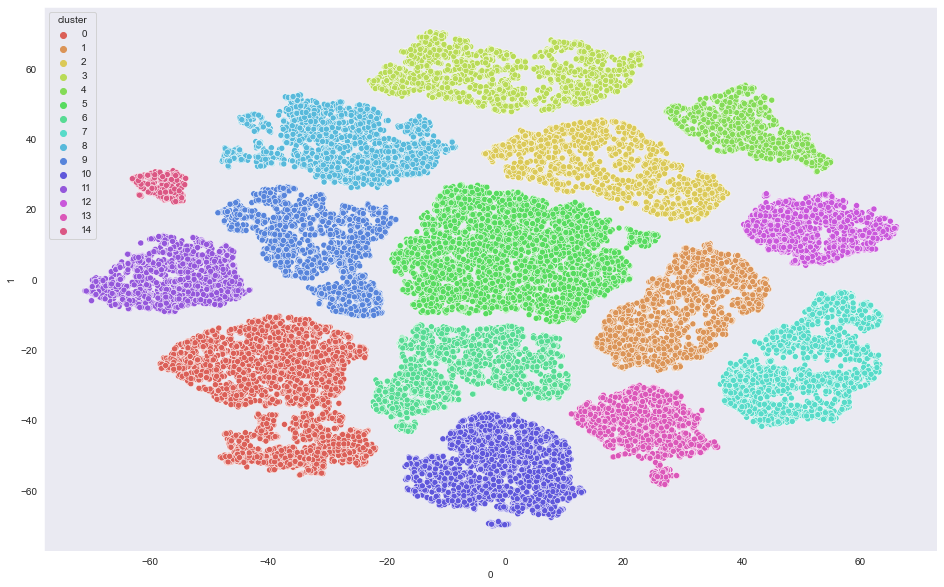

In [42]:
tsne_agg = tnse_result_df.copy(deep=True)
tsne_agg['cluster'] = agg_labels
plt.figure(figsize=(16, 10))
sns.scatterplot(data=tsne_agg, x=0, y=1, hue='cluster', palette=sns.color_palette('hls', 15))

## Birch

In [42]:
from sklearn.cluster import Birch
model_br = Birch(n_clusters=16).fit(df_gen)
br_labels = model_br.labels_
score = silhouette_score(df_gen, br_labels, metric='euclidean')
print(score)

0.70690364


In [44]:
len(set(br_labels))

15

<AxesSubplot:xlabel='0', ylabel='1'>

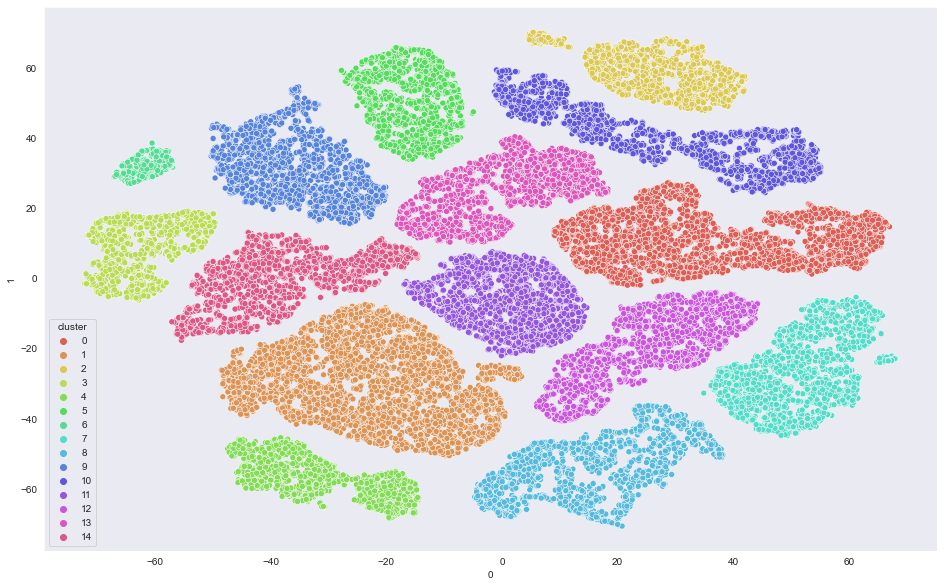

In [47]:
tsne_br = tnse_result_df.copy(deep=True)
tsne_br['cluster'] = br_labels
plt.figure(figsize=(16, 10))
sns.scatterplot(data=tsne_br, x=0, y=1, hue='cluster', palette=sns.color_palette('hls', 15))

## Mini Batch Kmeans

In [40]:
from sklearn.cluster import MiniBatchKMeans
mini_kmean = MiniBatchKMeans(n_clusters=16)
mini_kmean.fit(df_gen)
mini_kmean_labels = mini_kmean.labels_
score = silhouette_score(df_gen, mini_kmean_labels, metric='euclidean')
print(score)

0.6802779


<AxesSubplot:xlabel='0', ylabel='1'>

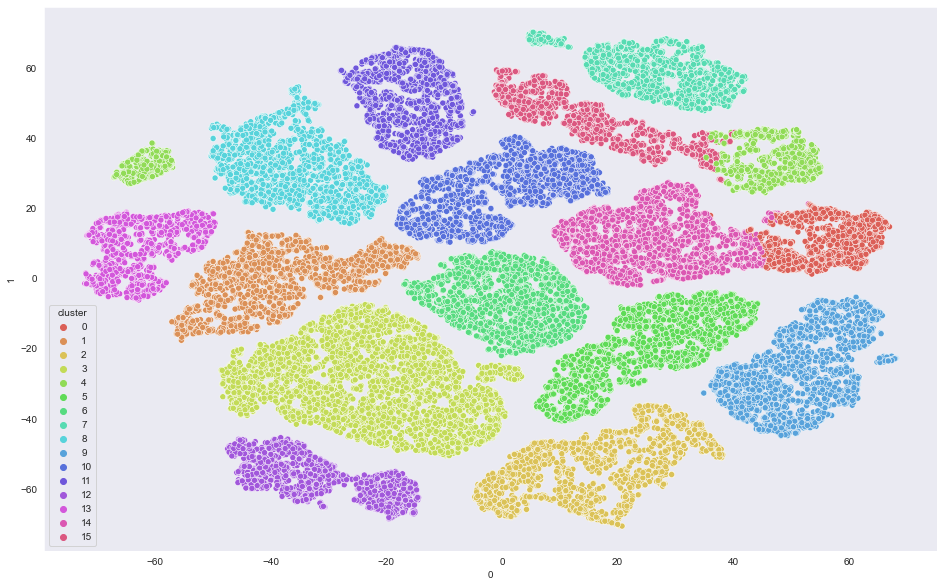

In [41]:
tsne_mk = tnse_result_df.copy(deep=True)
tsne_mk['cluster'] = mini_kmean_labels
plt.figure(figsize=(16, 10))
sns.scatterplot(data=tsne_mk, x=0, y=1, hue='cluster', palette=sns.color_palette('hls', 16))

# Saving Results

In [16]:
import pickle
pickle.dump(kmean, open("resources/model.pkl", "wb"))
pickle.dump(scaler, open("resources/scaler.pkl", "wb"))
pickle.dump(fs, open("resources/feature_selector.pkl", "wb"))
df_original['cluster'] = kmean_clusters
df_original.to_csv('resources/musics_clustered.csv', index=False)